# Notebook used for generating cool dominant color images.

In [1]:
from GMM import GMM
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
im = cv2.cvtColor(cv2.imread("rubik.jpg"), cv2.COLOR_BGR2RGB)
im_shape = im.shape
cluster_able = im.reshape(-1, 3)

ss = StandardScaler()
scaled_im = ss.fit_transform(cluster_able)

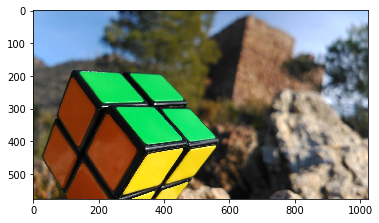

In [3]:
plt.imshow(im)

In [34]:
axes[:, 0][0].set_xticks

<bound method _AxesBase.set_xticks of <matplotlib.axes._subplots.AxesSubplot object at 0x0000015900658940>>

In [51]:
KMeans.__name__, GMM.__name__

('KMeans', 'GMM')

c:\users\stone\desktop\fall20~1\probmo~1\prob_m~1\lib\site-packages\sklearn\cluster\k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
c:\users\stone\desktop\fall20~1\probmo~1\prob_m~1\lib\site-packages\sklearn\cluster\k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
c:\users\stone\desktop\fall20~1\probmo~1\prob_m~1\lib\site-packages\sklearn\cluster\k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
c:\users\stone\desktop\fall20~1\probmo~1\prob_m~1\lib\site-packages\sklearn\cluster\k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
c:\users\stone\desktop\fall20~1\probmo~1\prob_m~1\li

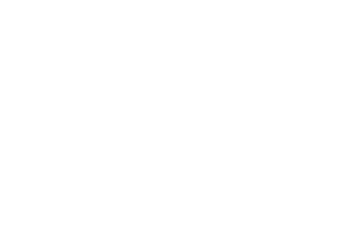

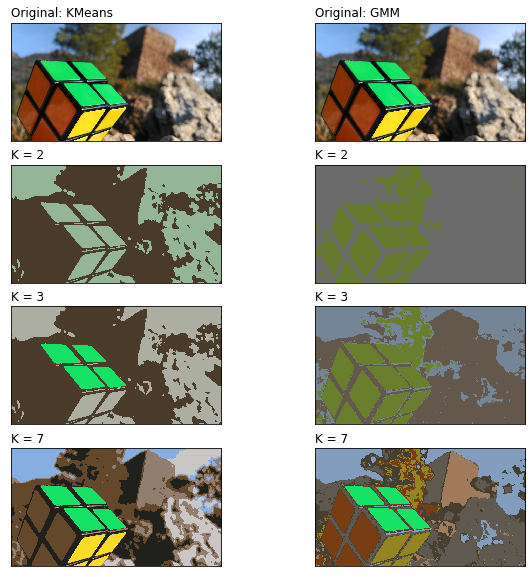

In [56]:
plt.axis('off')
fig, axes = plt.subplots(4, 2, figsize=(10,10))
for axs, classer in zip(axes.T, [KMeans, GMM]):
    axs[0].imshow(im)
    axs[0].set_title('Original: {}'.format(classer.__name__), loc='left')
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    for ax, num_colors in zip(axs[1:], [2, 3, 7]):
        ax.set_title("K = {}".format(num_colors), loc='left')
        ax.set_xticks([])
        ax.set_yticks([])
        mus= np.array([[np.random.rand() for _ in range(3)] for _ in range(num_colors)])
        covs = np.array([np.identity(3)]*num_colors)
        try:
            c = classer(num_colors, mus, initial_covs=covs)
            c.fit(scaled_im, iters=50)
        except:
            c = classer(num_colors, mus).fit(scaled_im)
            c.fit(scaled_im)
        new_img = scaled_im.copy()
        preds = c.predict(scaled_im)
        
        for i in range(num_colors):
            new_img[preds == i] = ss.inverse_transform(c.cluster_centers_[i])
        ax.imshow(new_img.reshape(im_shape).astype('int'))
plt.savefig('image_comparison.png', bbox_inches='tight')

In [58]:
num_colors = 5
mus= np.array([[np.random.rand() for _ in range(3)] for _ in range(num_colors)])#kmm.cluster_centers_
kmm = KMeans(n_clusters=num_colors, init=mus).fit(scaled_im)
new_img = scaled_im.copy()
img_preds = kmm.predict(scaled_im)

for k in range(num_colors):
    new_img[img_preds == k] = ss.inverse_transform(kmm.cluster_centers_[k])

c:\users\stone\desktop\fall20~1\probmo~1\prob_m~1\lib\site-packages\sklearn\cluster\k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


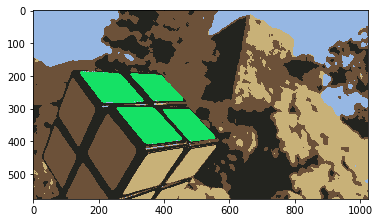

In [59]:
plt.imshow(new_img.reshape(im_shape).astype('int'))

In [62]:
# mus= [[np.random.rand() for _ in range(3)] for _ in range(len(kmm.cluster_centers_))]#kmm.cluster_centers_
# mus= kmm.cluster_centers_
gmm = GMM(num_colors, initial_mus=mus, initial_covs=[np.identity(3)]*num_colors, verbose=1)
gmm.verbose=1
gmm.fit(scaled_im, iters=20)

num_colors = 3
new_img = cluster_able.copy()
img_preds = gmm.predict(scaled_im)

for k in range(num_colors):
    new_img[img_preds == k] = ss.inverse_transform(gmm.means[k])

Iteration: 0
Means: [array([-0.66797428,  0.25258709, -0.30803466]), array([0.62916864, 0.62712624, 1.04727489]), array([-1.32045562,  1.70630787,  0.18231218]), array([-0.24192325, -0.73500092, -0.63216316]), array([-0.21146487, -0.38240932, -0.76624978])]
Iteration: 1
Means: [array([-0.3048415 , -0.26868696, -0.29424062]), array([0.95550758, 0.91648326, 1.07840105]), array([-0.8741303 ,  1.29510531,  0.27786087]), array([-0.40668661, -0.70218166, -0.61397223]), array([-0.2862679 , -0.59165946, -0.56974554])]
Iteration: 2
Means: [array([-0.22199622, -0.42790207, -0.35609972]), array([1.03905284, 0.98734979, 1.11185855]), array([-1.17126947,  1.55748761,  0.20433983]), array([-0.4505287 , -0.74906052, -0.62630368]), array([-0.33266147, -0.672435  , -0.59253279])]
Iteration: 3
Means: [array([-0.1526222 , -0.37809439, -0.38211273]), array([1.04830527, 1.01725929, 1.15109833]), array([-1.26917714,  1.64969677,  0.17823637]), array([-0.46347274, -0.76119431, -0.61627813]), array([-0.287347

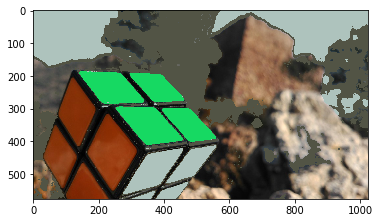

In [63]:
plt.imshow(new_img.reshape(im_shape))